# 🧠 Heart Disease ML Project - Notebook 5: Unsupervised Clustering

This notebook explores unsupervised learning using clustering methods:
- 🔹 K-Means Clustering
- 🔸 Hierarchical (Agglomerative) Clustering

We'll also:
- Use PCA to reduce dimensions
- Visualize clusters in 2D/3D
- Compare clustering labels to true labels

---

## 📦 1. Import Required Libraries


In [34]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

# Ensure plot folder exists
os.makedirs("plots", exist_ok=True)

## 📥 2. Load Data for Clustering (PCA-Transformed)




In [35]:
# If PCA-transformed data is not saved, re-run PCA (3 components)
X_train = pd.read_csv("/content/heart_disease_train.csv")
y_train = pd.read_csv("/content/heart_disease_train_target.csv")

pca = PCA()
X_train_pca = pca.fit_transform(X_train)

#🔹 3. K-Means Clustering
### 📈 Elbow Method to Determine Optimal k


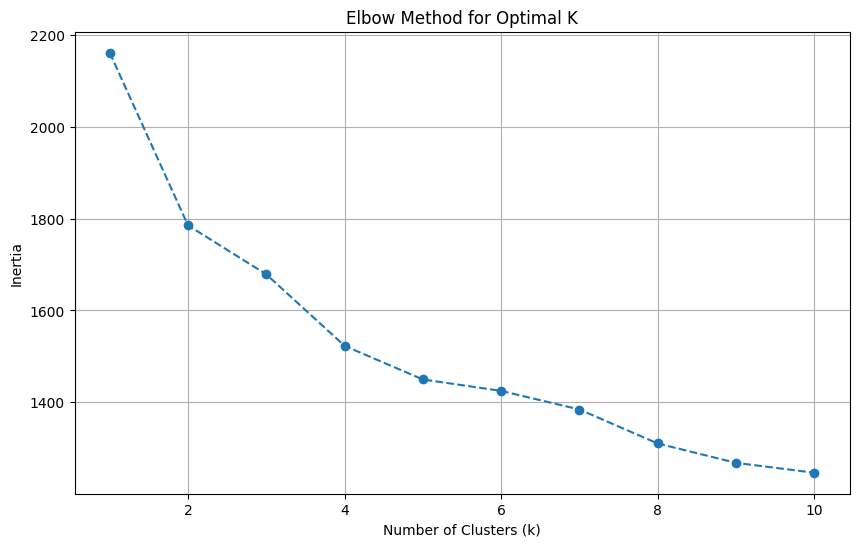

In [36]:
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_pca)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid()
plt.savefig("plots/kmeans_elbow.png")
plt.show()

### ✅ Apply K-Means with k = 2


In [37]:
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_train_pca)

silhouette = silhouette_score(X_train_pca, kmeans_labels)
print(f"🔍 K-Means Silhouette Score: {silhouette:.3f}")

🔍 K-Means Silhouette Score: 0.177


### 🟢 2D PCA Cluster Plot


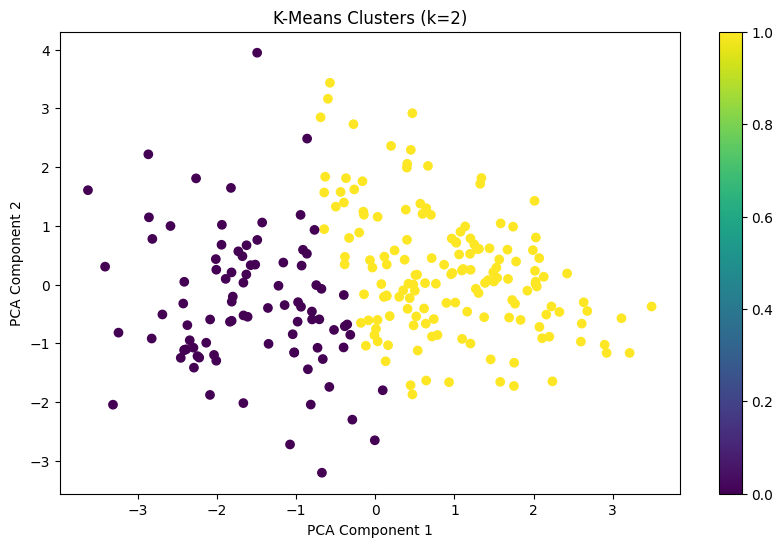

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=kmeans_labels, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title(f'K-Means Clusters (k={optimal_k})')
plt.colorbar()
plt.savefig("/content/plots/kmeans_clusters.png")
plt.show()

# 🔸 4. Hierarchical Clustering
### 🌿 Dendrogram (on 100 samples for readability)


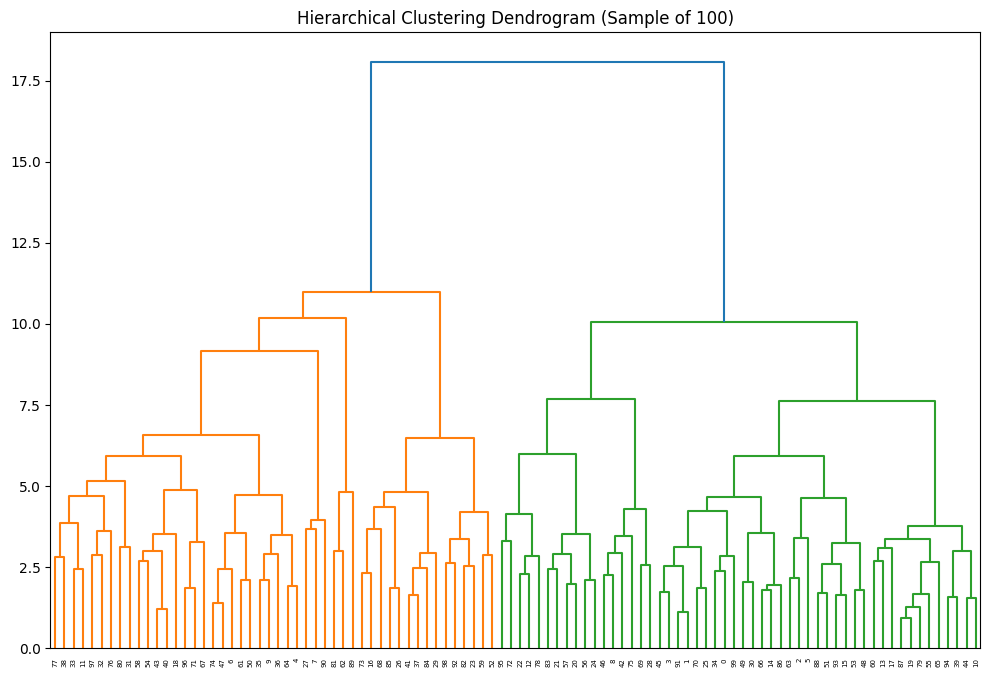

In [39]:
sample_pca = X_train_pca[:100]

plt.figure(figsize=(12, 8))
linked = linkage(sample_pca, method='ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram (Sample of 100)')
plt.savefig("/content/plots/hierarchical_dendrogram.png")
plt.show()

### 🧬 Apply Agglomerative Clustering


In [40]:
agg_cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
agg_labels = agg_cluster.fit_predict(X_train_pca)

silhouette_agg = silhouette_score(X_train_pca, agg_labels)
print(f"🔍 Agglomerative Clustering Silhouette Score: {silhouette_agg:.3f}")

🔍 Agglomerative Clustering Silhouette Score: 0.138


## 🔁 5. Compare Cluster Labels to True Labels

In [41]:
comparison_df = pd.DataFrame({
    'Actual': y_train.squeeze().reset_index(drop=True),  # ensure 1D
    'KMeans_Cluster': np.array(kmeans_labels).squeeze(),  # ensure 1D
    'Agglomerative_Cluster': np.array(agg_labels).squeeze()  # ensure 1D
})


print("\n📊 KMeans vs Actual:")
print(comparison_df.groupby(['KMeans_Cluster', 'Actual']).size().unstack())

print("\n📊 Agglomerative vs Actual:")
print(comparison_df.groupby(['Agglomerative_Cluster', 'Actual']).size().unstack())


📊 KMeans vs Actual:
Actual            0   1
KMeans_Cluster         
0                18  72
1               113  39

📊 Agglomerative vs Actual:
Actual                  0   1
Agglomerative_Cluster        
0                      99  32
1                      32  79


## 🔷 6. 3D PCA Cluster Visualization (Plotly)

In [42]:
# Reduce to 3 components if not already done
pca_3d = PCA(n_components=3)
X_train_pca_3d = pca_3d.fit_transform(X_train)

fig = px.scatter_3d(
    x=X_train_pca_3d[:, 0],
    y=X_train_pca_3d[:, 1],
    z=X_train_pca_3d[:, 2],
    color=kmeans_labels.astype(str),
    title="K-Means Clustering in 3D PCA Space",
    labels={'color': 'Cluster'},
    template='plotly_white'
)
fig.write_html("plots/kmeans_3d_clusters.html")
fig.show()